In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [3]:
x = sp.symbols('x')
funcs = [
    sp.sin(x**2),
    sp.cos(sp.sin(x)),
    sp.exp(sp.sin(sp.cos(x))),
    sp.log(x+3),
    (x+3)**(0.5)
]


In [4]:
methods = [
    (lambda f, x, h: (f(x+h) - f(x)) / h, "Прямая разность"),
    (lambda f, x, h: (f(x) - f(x-h)) / h, "Обратная разность"),
    (lambda f, x, h: (f(x+h) - f(x-h)) / (2*h), "Центральная разность"),
    (lambda f, x, h: (4*(f(x+h)-f(x-h)) - (1/2)*(f(x+2*h)-f(x-2*h))) / (6*h), "Схема 4-го порядка"),
    (lambda f, x, h: (3/2*(f(x+h)-f(x-h))/(2*h) 
                      - 3/5*(f(x+2*h)-f(x-2*h))/(4*h) 
                      + 1/10*(f(x+3*h)-f(x-3*h))/(6*h)), "Схема 6-го порядка"),
]

In [5]:
f_list = [(sp.lambdify(x, f, "numpy"), sp.lambdify(x, sp.diff(f, x), "numpy"), sp.latex(f)) 
          for f in funcs]

In [6]:
def plot_errors(f_list, methods, x0=1.0, num_points=100):
    """
    f_list: list of tuples (f, df, fname)
    methods: list of tuples (numerical_derivative_function, method_name)
    x0: точка, где считаем производную
    num_points: количество шагов h для графика
    """
    # шаги h, более плотные, log-scale
    hs = np.logspace(-20, 0, num=num_points, base=2)

    for f, df, fname in f_list:
        df_exact = df(x0)
        plt.figure(figsize=(8,6))
        for m, mname in methods:
            errors = [abs(m(f, x0, h) - df_exact) for h in hs]
            plt.plot(hs, errors, linestyle='-', label=mname)

        plt.xscale("log", base=2)
        plt.yscale("log", base=2)
        plt.xlabel(r"$h$")
        plt.ylabel(r"Ошибка")
        plt.title(rf"${fname}$")
        plt.grid(True, which="both", ls="--")
        plt.legend()
        plt.show()


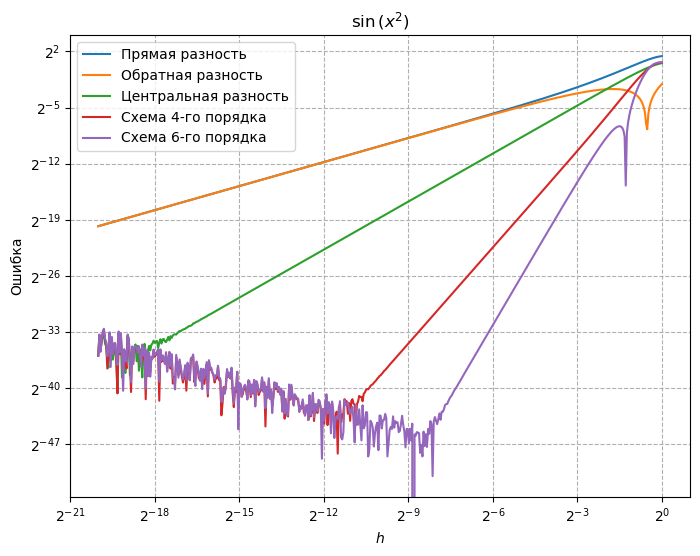

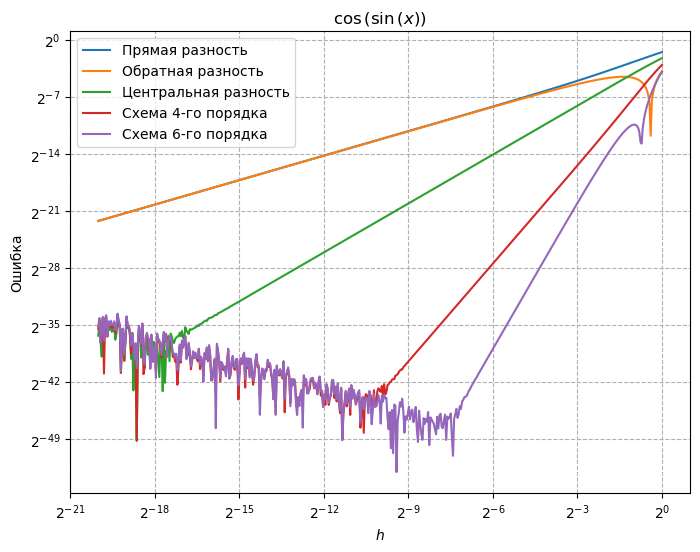

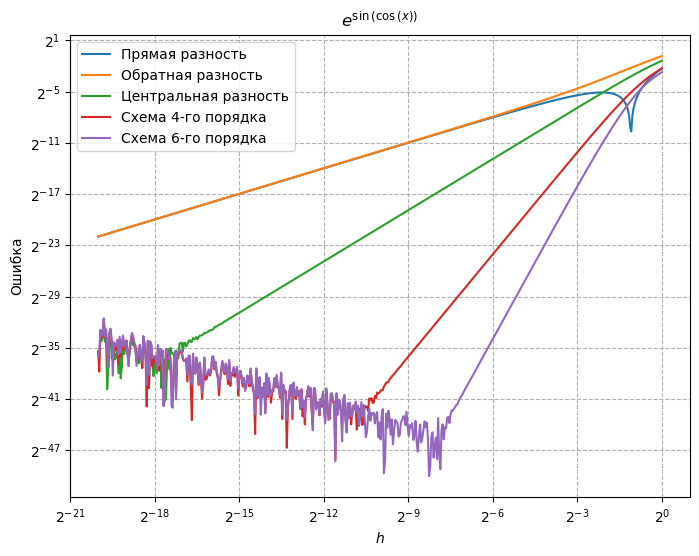

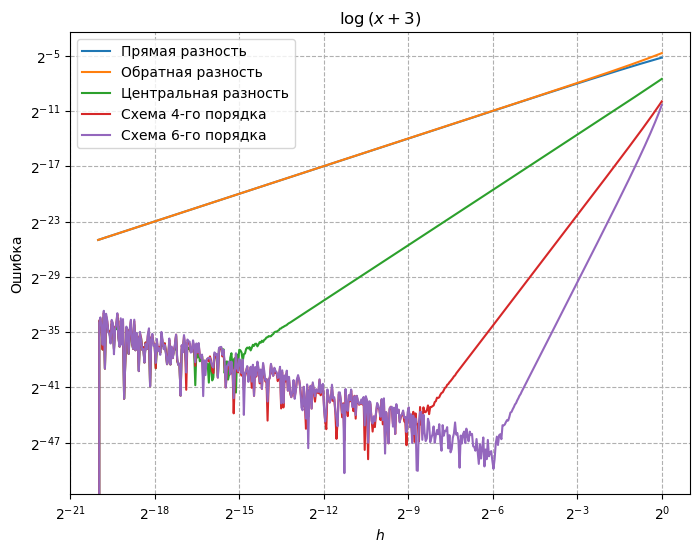

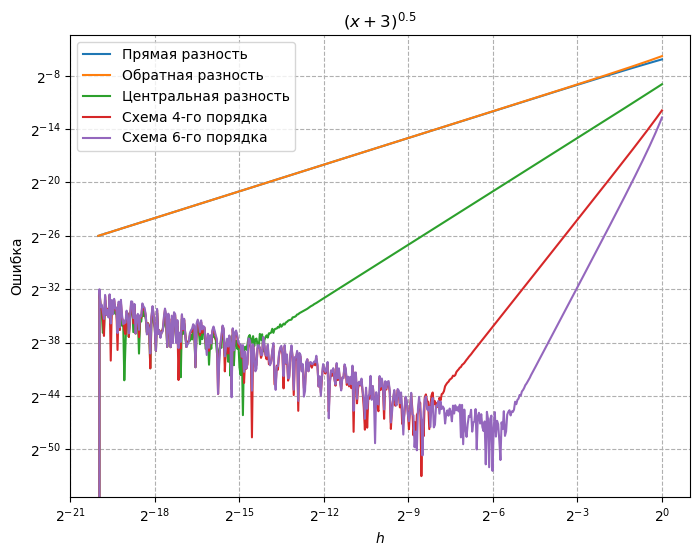

In [7]:
plot_errors(f_list, methods, 1, 500)